<a href="https://colab.research.google.com/github/Myavuzars/MachineLearning/blob/main/Practice0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from numpy import mean

In [3]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pandas/auto_fake.csv")

In [5]:
df.head(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1,buick skylark 320
2,NaN,8.0,318.0,150,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1,amc rebel sst


In [6]:
#Car name value counts
df['car name'].value_counts

<bound method IndexOpsMixin.value_counts of 0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 398, dtype: object>

In [7]:
#Drop Car name
df.drop(['car name'],axis=1, inplace=True)
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1
2,NaN,8.0,318.0,150,3436.0,11.0,70.0,1
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1
4,17.0,8.0,NaN,140,3449.0,10.5,70.0,1


In [8]:
df.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year      float64
origin            int64
dtype: object

In [9]:
#convert object to float
df['horsepower'] = df['horsepower'].str.replace('?', '0')
#Filling NAN values for Horsepower 
df2 = df.fillna({'horsepower':0}) #using dictionary method
df2["horsepower"] = df2['horsepower'].astype(float)
#To avoid misinterpretation, i will reconvert zeros to NaNs
df2['horsepower'] = df2['horsepower'].replace(0, np.NaN)


In [10]:
w=[]
for i in range(0,398): 
    x= df2['horsepower'][i]
    w.append(x)
print(w)

[130.0, 165.0, 150.0, 150.0, 140.0, 198.0, 220.0, 215.0, 225.0, 190.0, 170.0, 160.0, 150.0, 225.0, 95.0, 95.0, 97.0, 85.0, nan, 46.0, 87.0, 90.0, 95.0, 113.0, 90.0, 215.0, 200.0, 210.0, 193.0, 88.0, 90.0, 95.0, nan, 100.0, 105.0, 100.0, 88.0, 100.0, 165.0, 175.0, 153.0, 150.0, 180.0, 170.0, 175.0, 110.0, 72.0, 100.0, 88.0, 86.0, 90.0, 70.0, 76.0, 65.0, 69.0, 60.0, 70.0, 95.0, 80.0, 54.0, 90.0, 86.0, 165.0, 175.0, 150.0, 153.0, 150.0, nan, 155.0, 160.0, 190.0, 97.0, 150.0, 130.0, 140.0, 150.0, 112.0, 76.0, 87.0, 69.0, 86.0, 92.0, 97.0, 80.0, 88.0, 175.0, 150.0, 145.0, 137.0, 150.0, 198.0, 150.0, 158.0, 150.0, 215.0, 225.0, 175.0, 105.0, nan, 100.0, 88.0, 95.0, 46.0, 150.0, 167.0, 170.0, 180.0, 100.0, 88.0, 72.0, 94.0, 90.0, 85.0, 107.0, 90.0, 145.0, 230.0, 49.0, 75.0, 91.0, 112.0, 150.0, 110.0, 122.0, 180.0, 95.0, nan, 100.0, 100.0, 67.0, 80.0, 65.0, 75.0, 100.0, 110.0, 105.0, 140.0, 150.0, 150.0, 140.0, 150.0, 83.0, 67.0, 78.0, 52.0, 61.0, 75.0, 75.0, 75.0, 97.0, 93.0, 67.0, 95.0, 105.

In [11]:
df2.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year      float64
origin            int64
dtype: object

#DEALING WITH NAs


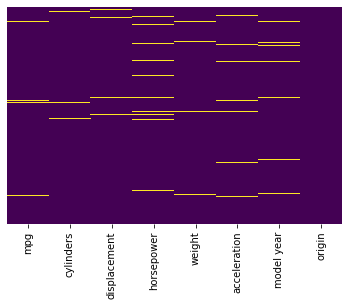

In [12]:
# Using heat map to check if there is any missing values
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

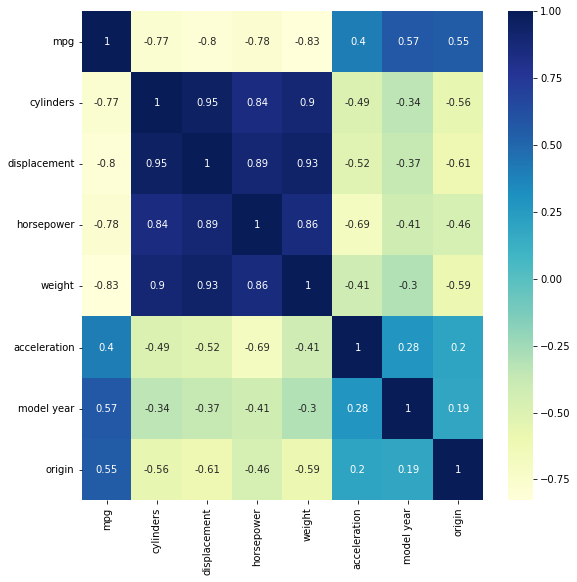

In [13]:
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(9,9))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [14]:
# using isnull() function  
df2.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [15]:
 df2.isnull().sum()

mpg             10
cylinders        8
displacement     8
horsepower      14
weight           7
acceleration     9
model year      10
origin           0
dtype: int64

In [16]:
df2.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1
2,NaN,8.0,318.0,150.0,3436.0,11.0,70.0,1


In [17]:
df2[df2['displacement'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
4,17.0,8.0,NaN,140.0,3449.0,10.5,70.0,1
5,15.0,8.0,NaN,198.0,4341.0,10.0,70.0,1
6,14.0,8.0,NaN,220.0,4354.0,9.0,70.0,1
20,25.0,4.0,NaN,87.0,2672.0,17.5,70.0,2
61,21.0,4.0,NaN,86.0,2226.0,16.5,72.0,1
166,13.0,8.0,NaN,NaN,3169.0,12.0,NaN,1
197,29.0,4.0,NaN,NaN,1937.0,14.2,76.0,2
202,17.5,6.0,NaN,NaN,3193.0,17.8,76.0,1


In [18]:
#Mean of displacement when cylinders=4,6,8
m_d4 = df2.loc[(df2['cylinders']==4),'displacement'].mean()
m_d4 = round(m_d4, 2)
m_d6 = df2.loc[df2['cylinders']==6,'displacement'].mean()
m_d6 = round(m_d6, 2)
m_d8 = df2.loc[df2['cylinders']==8,'displacement'].mean()
m_d8 = round(m_d8, 2)
print(m_d4,m_d6,m_d8)

110.03 218.14 341.71


In [19]:
#Replacing dispacement by cylinders
print(df2.displacement.isnull().sum())
df2.loc[(df2.displacement.isnull())&(df2['cylinders']==4), 'displacement']=m_d4
df2.loc[(df2.displacement.isnull())&(df2['cylinders']==6), 'displacement'] =m_d6
df2.loc[(df2.displacement.isnull())&(df2['cylinders']==8), 'displacement'] =m_d8
print(df2.displacement.isnull().sum())

8
0


In [20]:
df2[df2['displacement'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin


In [21]:
df2[df2['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
18,27.0,4.0,97.00,NaN,2130.0,14.5,70.0,3
32,25.0,4.0,98.00,NaN,2046.0,19.0,71.0,1
67,11.0,8.0,429.00,NaN,4633.0,11.0,72.0,1
98,16.0,6.0,250.00,NaN,3278.0,18.0,73.0,1
126,21.0,6.0,200.00,NaN,2875.0,17.0,74.0,1
166,13.0,8.0,341.71,NaN,3169.0,12.0,NaN,1
192,22.0,6.0,250.00,NaN,NaN,NaN,76.0,1
197,29.0,4.0,110.03,NaN,1937.0,14.2,76.0,2
202,17.5,6.0,218.14,NaN,3193.0,17.8,76.0,1
206,26.5,4.0,140.00,NaN,2565.0,13.6,76.0,1


In [22]:
#Mean of horsepower when cylinders=4,6,8
m_hp4 = df2.loc[(df2['cylinders']==4),'horsepower'].mean()
m_hp4 = round(m_hp4, 2)
m_hp6 = df2.loc[df2['cylinders']==6,'horsepower'].mean()
m_hp6 = round(m_hp6, 2)
m_hp8 = df2.loc[df2['cylinders']==8,'horsepower'].mean()
m_hp8 = round(m_hp8, 2)
print(m_hp4,m_hp6,m_hp8)

78.28 101.79 156.92


In [23]:
print(df2.horsepower.isnull().sum())
df2.loc[(df2.horsepower.isnull()) & (df2.cylinders==6), 'horsepower' ] = m_hp6
df2.loc[(df2.horsepower.isnull())  & (df2['cylinders']==4) , 'horsepower'] = m_hp4
df2.loc[(df2.horsepower.isnull())  & (df2['cylinders']==8) , 'horsepower'] = m_hp8
print(df2.horsepower.isnull().sum())

14
0


In [24]:
df2[df2['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin


In [25]:
df2[df2['weight'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
17,21.0,6.0,200.0,85.00,NaN,16.0,70.0,1
27,NaN,8.0,318.0,210.00,NaN,13.5,NaN,1
33,NaN,6.0,232.0,100.00,NaN,13.0,71.0,1
64,15.0,8.0,318.0,150.00,NaN,13.5,72.0,1
192,22.0,6.0,250.0,101.79,NaN,NaN,76.0,1
282,22.3,4.0,140.0,88.00,NaN,17.3,79.0,1
344,39.0,4.0,86.0,64.00,NaN,16.4,81.0,1


In [26]:
m_w= round(df2['weight'].mean(), 2)
m_w

2967.71

In [27]:
df2.loc[df2['weight'].isna(), 'weight']=m_w
df2[df2['weight'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin


In [28]:
df2[df2['mpg'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
2,NaN,8.0,318.0,150.0,3436.00,11.0,70.0,1
8,NaN,NaN,455.0,225.0,4425.00,10.0,70.0,1
27,NaN,8.0,318.0,210.0,2967.71,13.5,NaN,1
33,NaN,6.0,232.0,100.0,2967.71,13.0,71.0,1
70,NaN,8.0,400.0,190.0,4422.00,NaN,72.0,1
172,NaN,4.0,90.0,71.0,2223.00,NaN,75.0,2
175,NaN,NaN,90.0,70.0,1937.00,14.0,75.0,2
204,NaN,4.0,85.0,70.0,1990.00,17.0,76.0,3
286,NaN,8.0,302.0,129.0,3725.00,13.4,79.0,1
345,NaN,4.0,81.0,60.0,1760.00,16.1,81.0,3


In [29]:
m_mp3 = round(df2.loc[df2['weight']>3000,'mpg'].mean(),2)
m_mp2 =round(df2.loc[df2['weight']>2000,'mpg'].mean(),2)
m_mp1 = round(df2.loc[df2['weight']<2000, 'mpg'].mean(),2)
print(m_mp3, m_mp2, m_mp1)

16.89 22.47 33.15


In [30]:
print(df2.mpg.isnull().sum())
df2.loc[(df2.mpg.isnull())    & (df2.weight>3000), 'mpg']=m_mp3
df2.loc[(df2['mpg'].isnull()) & (df2.weight>2000), 'mpg']= m_mp2
df2.loc[(df2['mpg'].isnull()) & (df2.weight<2000), 'mpg']=m_mp1
print(df2.mpg.isnull().sum())

10
0


In [39]:
df2.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    9
model year      0
origin          0
dtype: int64

In [32]:
#Completing form by using mean
#Cylinders
print(df2['cylinders'].isnull().sum())
m_cy= round(df2.loc[df2['cylinders'].notnull(), 'cylinders'].mean(),2)
df2.loc[df2.cylinders.isnull(), 'cylinders'] = m_cy
print(df2['cylinders'].isnull().sum())


0

In [40]:
#Model Year
print(df2['model year'].isnull().sum())
m_year = round(df2.loc[df2['model year'].notnull(),'model year'].mean(),2)
print(m_year)
df2.loc[df2['model year'].isnull(), 'model year'] = m_year
print(df2['model year'].isnull().sum())


0
76.06
0


In [46]:
#Acccelaration
print(df2['acceleration'].isnull().sum())
m_acc=round(df2.loc[df2['acceleration'].notnull(),'acceleration'].mean(),2)
print(m_acc)
df2.loc[df2['acceleration'].isnull(), 'acceleration']=m_acc
print(df2['acceleration'].isnull().sum())


9
15.58
0


In [47]:
df2.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
#DONT USE IT
#Replacing NAN with mean
#ndf = df2.loc[df2['cylinders']==6,'horsepower'].replace(to_replace=np.nan, value=m_hp6)
#ndf.loc[ndf['cylinders']==6,'horsepower']
#ndf.head()

15     95.0
16     97.0
17     85.0
33    100.0
34    105.0
Name: horsepower, dtype: float64

In [ ]:
#Example
#Mean when cylinders=4,6,8
m_hp4 = df2.loc[(df2['cylinders']==4) & (df2["displacement"]>200),'horsepower'].mean()
m_hp4 = round(m1, 2)
m_hp4

nan

In [ ]:
#Aggregate function of mean
m2=df2.groupby(df2['cylinders']==4).agg({"horsepower" : np.mean}) 
m2

,horsepower
cylinders,
False,130.769634
True,78.279793


## **REMOVING OUTLIERS**

In [48]:
#Rows filterinf
df2.iloc[1:8,:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
1,15.00,8.0,350.00,165.0,3693.0,11.5,70.0,1
2,16.89,8.0,318.00,150.0,3436.0,11.0,70.0,1
3,16.00,8.0,304.00,150.0,3433.0,12.0,70.0,1
4,17.00,8.0,341.71,140.0,3449.0,10.5,70.0,1
5,15.00,8.0,341.71,198.0,4341.0,10.0,70.0,1
6,14.00,8.0,341.71,220.0,4354.0,9.0,70.0,1
7,14.00,8.0,440.00,215.0,4312.0,8.5,70.0,1


In [49]:
#column filtering
df2.iloc[:,0:8]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.00,8.0,307.00,130.0,3504.0,12.0,70.0,1
1,15.00,8.0,350.00,165.0,3693.0,11.5,70.0,1
2,16.89,8.0,318.00,150.0,3436.0,11.0,70.0,1
3,16.00,8.0,304.00,150.0,3433.0,12.0,70.0,1
4,17.00,8.0,341.71,140.0,3449.0,10.5,70.0,1
...,...,...,...,...,...,...,...,...
393,27.00,4.0,140.00,86.0,2790.0,15.6,82.0,1
394,44.00,4.0,97.00,52.0,2130.0,24.6,82.0,2
395,32.00,4.0,135.00,84.0,2295.0,11.6,82.0,1
396,28.00,4.0,120.00,79.0,2625.0,18.6,82.0,1


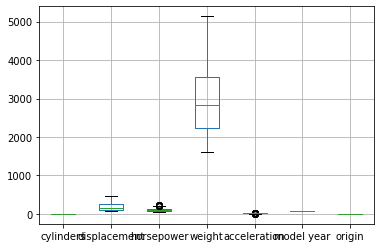

In [50]:
# Creating box-plot
boxplot = df2.boxplot(column=['cylinders',	'displacement',	'horsepower',	'weight',	'acceleration',	'model year',	'origin'])

plt.show()

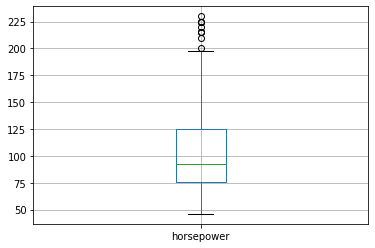

In [51]:
# Creating plot box plot for horse power and acceleration
boxplot = df2.boxplot(column=['horsepower'])

plt.show()

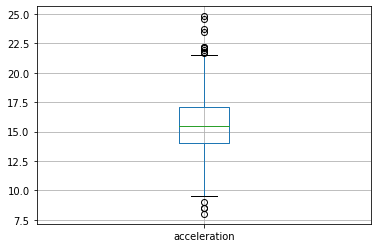

In [52]:
# Creating plot box plot for horse power and acceleration
boxplot = df2.boxplot(column=['acceleration'])

plt.show()

In [66]:
#Removing outliers
import numpy as np
from scipy import stats

z_scores = stats.zscore(df2)

abs_z_scores = np.abs(stats.zscore(df2))
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df2 = df2[filtered_entries]
new_df2.count()

mpg             391
cylinders       391
displacement    391
horsepower      391
weight          391
acceleration    391
model year      391
origin          391
dtype: int64

In [67]:
new_df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.00,8.0,307.00,130.0,3504.0,12.0,70.0,1
1,15.00,8.0,350.00,165.0,3693.0,11.5,70.0,1
2,16.89,8.0,318.00,150.0,3436.0,11.0,70.0,1
3,16.00,8.0,304.00,150.0,3433.0,12.0,70.0,1
4,17.00,8.0,341.71,140.0,3449.0,10.5,70.0,1


In [68]:
#Scaling
# copy the data
df_z_scaled = df2.copy()
  
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
# view normalized data   
display(df_z_scaled)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,-0.715549,1.520518,1.101156,0.679747,0.638882,-1.310189,-1.664000,-0.714246
1,-1.101177,1.520518,1.516665,1.598362,0.864036,-1.493089,-1.664000,-0.714246
2,-0.858231,1.520518,1.207449,1.204670,0.557874,-1.675989,-1.664000,-0.714246
3,-0.972634,1.520518,1.072167,1.204670,0.554300,-1.310189,-1.664000,-0.714246
4,-0.844092,1.520518,1.436559,0.942208,0.573361,-1.858889,-1.664000,-0.714246
...,...,...,...,...,...,...,...,...
393,0.441334,-0.858560,-0.512566,-0.475085,-0.211699,0.006691,1.630066,-0.714246
394,2.626557,-0.858560,-0.928075,-1.367454,-0.997951,3.298892,1.630066,0.532552
395,1.084046,-0.858560,-0.560881,-0.527577,-0.801388,-1.456509,1.630066,-0.714246
396,0.569876,-0.858560,-0.705826,-0.658808,-0.408262,1.104091,1.630066,-0.714246


#EXTRA INFORMATION

In [ ]:
#EXAMPLE
dfm = pd.DataFrame({'a':np.arange(30), 'Cluster':np.ones(30,dtype=np.int)})
dfm.loc[10:19, "Cluster"] *= 2
dfm.loc[20:,   "Cluster"] *= 3
dfm.head(3)
# This line is all you need
#df.loc[(df['Cluster']==1)|(df['Cluster']==2), 'a'].mean()

,a,Cluster
0,0,1
1,1,1
2,2,1


In [ ]:
df.cylinders.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: cylinders, Length: 398, dtype: bool

In [ ]:
# using notnull() function
df.notnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
393,True,True,True,True,True,True,True,True,True
394,True,True,True,True,True,True,True,True,True
395,True,True,True,True,True,True,True,True,True
396,True,True,True,True,True,True,True,True,True


In [ ]:
#Subsetting notnull()
df[df.mpg.notnull()] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1,buick skylark 320
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8.0,NaN,140,3449.0,10.5,70.0,1,ford torino
5,15.0,8.0,NaN,198,4341.0,10.0,70.0,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86,2790.0,15.6,82.0,1,ford mustang gl
394,44.0,4.0,97.0,52,2130.0,24.6,82.0,2,vw pickup
395,32.0,4.0,135.0,84,2295.0,11.6,82.0,1,dodge rampage
396,28.0,4.0,120.0,79,2625.0,18.6,82.0,1,ford ranger


In [ ]:
#Filling NAN values with zero
df2 = df.fillna(value=0)
df2.isnull().sum()
#Filling NAN values with previous value
df3 = df.fillna(method='pad')
#Filling NAN values with  next value
df4 = df.fillna(method='bfill') #backward fill
#Filling NAN values with with row axis
df5 = df.fillna(method='bfill', axis=1) 


In [ ]:
#Using isna() to select all rows with NaN under an entire DataFrame:
ndf =df2[df2.isna().any(axis=1)]
ndf.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
2,NaN,8.0,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite
4,17.0,8.0,NaN,140.0,3449.0,10.5,70.0,1,ford torino
5,15.0,8.0,NaN,198.0,4341.0,10.0,70.0,1,ford galaxie 500
6,14.0,8.0,NaN,220.0,4354.0,9.0,70.0,1,chevrolet impala
8,NaN,NaN,455.0,225.0,4425.0,10.0,70.0,1,pontiac catalina


In [ ]:
#Filling NAN values for certain columns
df6 = df.fillna({'displacement':'AAAA',
                 'horsepower':'BBBB'}) #using dictionary method

new2df = df6.loc[((df6['displacement'] == 'AAAA') | (df6['horsepower'] == 'BBBB')) ]
new2df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
4,17.0,8.0,AAAA,140,3449.0,10.5,70.0,1,ford torino
5,15.0,8.0,AAAA,198,4341.0,10.0,70.0,1,ford galaxie 500
6,14.0,8.0,AAAA,220,4354.0,9.0,70.0,1,chevrolet impala
18,27.0,4.0,97,BBBB,2130.0,14.5,70.0,3,datsun pl510
20,25.0,4.0,AAAA,87,2672.0,17.5,70.0,2,NaN


In [ ]:
#DropNA
df10 = df.dropna()
df10.count

df11 = df.dropna(how='all') # drop only rows that has all nan values
df12 = df.dropna(how='any') # drop rows that has any nan values
df12.head(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1,buick skylark 320
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1,amc rebel sst
7,14.0,8.0,440.0,215,4312.0,8.5,70.0,1,plymouth fury iii


In [ ]:
# Drop Nas with certain columns
#first find out how many NAs in mpg and horsepower
d1 = df.mpg.isnull().sum()
d2 = df.mpg.isnull().sum()
print(f'Total NA in mpg {d1}, total NA in horsepower: {d2}')
df11=df.dropna(subset=['mpg','horsepower'], how='any')
print(f'Total observation in df {df.shape}')
print(f'df11 shape is {df11.shape}') # after drops the columns with na

Total NA in mpg 10, total NA in horsepower: 10
Total observation in df (398, 9)
df11 shape is (380, 9)


In [ ]:
#Replace
import numpy as np
df13 = df.replace(to_replace=np.nan, value=0)

df13.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1,buick skylark 320
2,0.0,8.0,318.0,150,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8.0,0.0,140,3449.0,10.5,70.0,1,ford torino


In [ ]:
#Interpolate
#First, lets see the missing values
df[df['displacement'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
4,17.0,8.0,NaN,140,3449.0,10.5,70.0,1,ford torino
5,15.0,8.0,NaN,198,4341.0,10.0,70.0,1,ford galaxie 500
6,14.0,8.0,NaN,220,4354.0,9.0,70.0,1,chevrolet impala
20,25.0,4.0,NaN,87,2672.0,17.5,70.0,2,NaN
61,21.0,4.0,NaN,86,2226.0,16.5,72.0,1,ford pinto runabout
166,13.0,8.0,NaN,NaN,3169.0,12.0,NaN,1,ford mustang ii
197,29.0,4.0,NaN,NaN,1937.0,14.2,76.0,2,vw rabbit
202,17.5,6.0,NaN,NaN,3193.0,17.8,76.0,1,amc pacer d/l


In [ ]:
#Interpolate
#uses mean values for missing values
df['displacement'] = df['displacement'].interpolate(method='linear')

#Lets check if still missing value exist
df[df['displacement'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [ ]:
#Whole data set
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1,buick skylark 320
2,NaN,8.0,318.0,150,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8.0,338.0,140,3449.0,10.5,70.0,1,ford torino


In [ ]:
#Interpolating the whole data set with a condition

df.groupby('cylinders')['displacement'].transform(lambda group: group.interpolate(method='linear'))

ValueError: ignored

In [ ]:
df['displacement']=df.groupby('cylinders')['displacement'].apply(lambda x : x.interpolate(method = "spline", order = 1, limit_direction = "both"))
df['mpg']=df.groupby('cylinders')['mpg'].apply(lambda x : x.interpolate(method = "spline", order = 1, limit_direction = "both"))
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.000000,8.0,307.000000,130,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.000000,8.0,350.000000,165,3693.0,11.5,70.0,1,buick skylark 320
2,16.304623,8.0,318.000000,150,3436.0,11.0,70.0,1,plymouth satellite
3,16.000000,8.0,304.000000,150,3433.0,12.0,70.0,1,amc rebel sst
4,17.000000,8.0,338.131352,140,3449.0,10.5,70.0,1,ford torino


In [ ]:
#Value Counts
#Value counts return how many unique values in a specific column
df.cylinders.value_counts() # missing values are excluded



4.0    201
8.0    100
6.0     82
3.0      4
5.0      3
Name: cylinders, dtype: int64

In [ ]:
df.cylinders.value_counts(dropna=False) # Now we can see the missing values

4.0    201
8.0    100
6.0     82
NaN      8
3.0      4
5.0      3
Name: cylinders, dtype: int64

In [ ]:
#to make changes in the dataframe and fill the values with zero
df['cylinders'].fillna(value=0, inplace=True)


In [ ]:
#then check the value counts
df.cylinders.value_counts() # Now we can see the missing values

4.0    201
8.0    100
6.0     82
0.0      8
3.0      4
5.0      3
Name: cylinders, dtype: int64

In [ ]:
#DONT USE IT
#Based on the correlation matrix, I will fill in the missing values with mean, using condition of highest correlation
#df2['displacement']=df2.groupby('cylinders')['displacement'].apply(lambda x : x.interpolate(method = "spline", order = 1, limit_direction = "both"))
df2[df2['displacement'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
8,NaN,NaN,NaN,225.0,4425.0,10.0,70.0,1,pontiac catalina
9,15.0,NaN,NaN,190.0,3850.0,8.5,70.0,1,amc ambassador dpl
22,25.0,NaN,NaN,95.0,2375.0,17.5,NaN,2,NaN
24,21.0,NaN,NaN,90.0,2648.0,15.0,70.0,1,amc gremlin
63,14.0,NaN,NaN,175.0,4385.0,12.0,72.0,1,pontiac catalina
101,23.0,NaN,NaN,95.0,2904.0,16.0,73.0,1,plymouth duster
175,NaN,NaN,NaN,70.0,1937.0,14.0,75.0,2,volkswagen rabbit
205,28.0,NaN,NaN,75.0,2155.0,16.4,76.0,3,toyota corolla


In [ ]:
# replacing missing values in quantity
# column with mean of that column
data['quantity'] = data['quantity'].fillna(data['quantity'].mean())
  
# replacing missing values in price column
# with median of that column
data['price'] = data['price'].fillna(data['price'].median())
  
# replacing missing values in bought column with
# standard deviation of that column
data['bought'] = data['bought'].fillna(data['bought'].std())
  
# replacing missing values in forenoon  column with
# minimum number of that column
data['forenoon'] = data['forenoon'].fillna(data['forenoon'].min())
  
# replacing missing values in afternoon  column with 
# maximum number of that column
data['afternoon'] = data['afternoon'].fillna(data['afternoon'].max())
  
print(Data)

In [ ]:
#df2['cylinders']=df2.groupby('displacement')['cylinders'].apply(lambda x : x.interpolate(method = "spline", order = 1, limit_direction = "both"))
#df2['horsepower']=df2.groupby('displacement')['horsepower'].apply(lambda x : x.interpolate(method = "spline", order = 1, limit_direction = "both"))
#df2['mpg']=df2.groupby('weight')['mpg'].apply(lambda x : x.interpolate(method = "spline", order = 1, limit_direction = "both"))
#df2['weight']=df2.groupby('mpg')['weight'].apply(lambda x : x.interpolate(method = "spline", order = 1, limit_direction = "both"))
#df2['acceleration']=df2.groupby('horsepower')['acceleration'].apply(lambda x : x.interpolate(method = "spline", order = 1, limit_direction = "both"))
#df2['model year']=df2.groupby('mpg')['model year'].apply(lambda x : x.interpolate(method = "spline", order = 1, limit_direction = "both"))
#df2['origin']=df2.groupby('displacement')['origin'].apply(lambda x : x.interpolate(method = "spline", order = 1, limit_direction = "both"))
#df2.head(10)

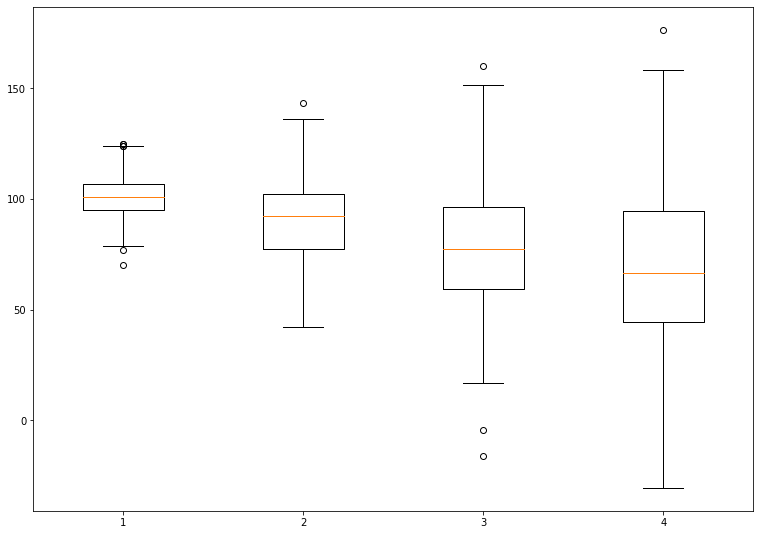

In [ ]:
# Creating dataset
np.random.seed(10)
 
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
np.random.seed(10)
 
data_1 = np.random.normal(100, 10, 10)
data_2 = np.random.normal(90, 20, 10)
data_3 = np.random.normal(80, 30, 10)
data_4 = np.random.normal(70, 40, 10)
data = [data_1, data_2, data_3, data_4]
data

[array([113.31586504, 107.15278974,  84.54599708,  99.9161615 ,
        106.21335974,  92.79914439, 102.65511586, 101.08548526,
        100.04291431,  98.25399789]),
 array([ 98.6605238 , 114.06074748,  70.69868659, 110.56548156,
         94.5726026 ,  98.90275226,  67.26795576,  92.70273757,
        119.69074004,  68.40390228]),
 array([ 20.66815158,  27.69883112,  87.98210492, 151.54901992,
        113.7107376 , 130.1786664 ,  82.97447648, 121.93989131,
         71.86256036,  98.39612555]),
 array([ 59.30731245,  48.02763944,  75.30833183,  50.9543194 ,
        122.33892323,  77.80053117,  86.00839953,  56.49470652,
        120.25889055,  40.72121992])]

In [ ]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))

data1 = [data1, d2, d2[::2]]
fig7, ax8 = plt.subplots()
ax8.set_title('Multiple Samples with Different sizes')
ax8.boxplot(data1)

plt.show()

NameError: ignored

In [ ]:
df2[::3].head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst
6,14.0,8.0,NaN,220.0,4354.0,9.0,70.0,1,chevrolet impala
9,15.0,NaN,390.0,190.0,3850.0,8.5,70.0,1,amc ambassador dpl
12,15.0,8.0,400.0,150.0,3761.0,9.5,70.0,1,chevrolet monte carlo
15,22.0,6.0,198.0,95.0,2833.0,15.5,70.0,1,plymouth duster


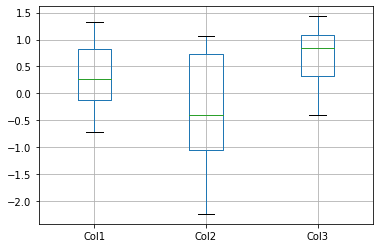

In [ ]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 4), columns=['Col1', 'Col2', 'Col3', 'Col4'])
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])